# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

### Team members:

+ Emmanuel Francisco González Velázquez - A01364577
+ Oscar Israel Lerma Franco - A01380817
+ Jesús Mario Martínez Díaz - A01740049
+ Eduardo Selim Martínez Mayorga - A01795167
+ José Antonio Hernández Hernández - A01381334

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 5 or 6 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [25]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt
import torch.optim as optim
#only if you have jupyterthemes
#from jupyterthemes import jtplot
#jtplot.style()

CIFAR-10 

Image Size: 32x32 pixels -  three color channels (RGB).

10 Classes: The dataset contains images from 10 distinct classes, which are:

Airplane

Automobile

Bird

Cat

Deer

Dog

Frog

Horse

Ship

Truck

Each class has the same number of images (6,000)

Low-Resolution: The images are relatively small and low resolution, making the dataset challenging for more advanced models to distinguish between fine-grained features.

Training Set: 50,000 images
Test Set: 10,000 images.
Color Images: All images are in RGB color format

### Download Cifar10 dataset

In [3]:
torch.cuda.is_available()

True

In [4]:
DATA_PATH = './CIFAR10_dataset'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 128

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True, 
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [5]:
# Get one batch of images from the training, validation, and test loaders
train_images, train_labels = next(iter(train_loader))
val_images, val_labels = next(iter(val_loader))
test_images, test_labels = next(iter(test_loader))

# Print the shape of the images and labels
print(f'Training set shape: {train_images.shape}, Labels shape: {train_labels.shape}')
print(f'Validation set shape: {val_images.shape}, Labels shape: {val_labels.shape}')
print(f'Test set shape: {test_images.shape}, Labels shape: {test_labels.shape}')

Training set shape: torch.Size([128, 3, 32, 32]), Labels shape: torch.Size([128])
Validation set shape: torch.Size([128, 3, 32, 32]), Labels shape: torch.Size([128])
Test set shape: torch.Size([128, 3, 32, 32]), Labels shape: torch.Size([128])


64: This is the batch size, meaning there are 64 images in this batch. You defined MINIBATCH_SIZE = 64, so each time you load data, it processes 64 images at once. If there are fewer than 64 images left in the dataset (like in the final batch), this number could be smaller for that last batch.

3: This represents the number of color channels in the images. In CIFAR-10, each image is an RGB image, so it has 3 color channels (Red, Green, Blue).

32, 32: These are the height and width of each image in pixels. CIFAR-10 consists of images that are 32x32 pixels.

64: This represents the number of labels in the batch, which matches the number of images (64). Each label corresponds to the class of one image in the batch.

In [6]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./CIFAR10_dataset
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [7]:
# Check the structure of one sample
image, label = cifar10_train[0]  # Access the first data point in the training set

# Print the shape and type of the image and label
print(f"Image shape: {image.shape}")  # Should be (3, 32, 32) for CIFAR-10 images
print(f"Image data type: {image.dtype}")
print(f"Label: {label}")
print(f"Label data type: {type(label)}")
print(f"Class: {cifar10_train.classes[label]}")

Image shape: torch.Size([3, 32, 32])
Image data type: torch.float32
Label: 6
Label data type: <class 'int'>
Class: frog


In [8]:
cifar10_train.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [9]:
train_loader.batch_size

128

In [10]:
for i, (x, y) in enumerate(train_loader):
    print(x, y)

tensor([[[[ 4.7305e-01,  9.2006e-02,  2.5077e-01,  ..., -2.7316e-01,
            6.0253e-02,  9.2006e-02],
          [ 2.3490e-01,  4.8893e-01,  6.9532e-01,  ...,  4.4376e-02,
           -9.8516e-02, -1.4615e-01],
          [ 2.8499e-02,  2.8253e-01,  3.6191e-01,  ...,  7.1120e-01,
            4.5717e-01,  9.2006e-02],
          ...,
          [ 4.0954e-01,  2.8253e-01,  2.9840e-01,  ..., -2.8904e-01,
           -4.0017e-01, -5.5894e-01],
          [ 6.6357e-01,  5.3656e-01,  6.4769e-01,  ..., -1.6202e-01,
           -4.7956e-01, -6.7008e-01],
          [ 6.3182e-01,  9.1760e-01,  1.0764e+00,  ..., -5.1131e-01,
           -4.7956e-01, -6.0657e-01]],

         [[ 7.2767e-01,  4.8560e-01,  5.6629e-01,  ...,  1.7591e-02,
            1.7897e-01,  2.4352e-01],
          [ 5.3401e-01,  6.9539e-01,  8.5677e-01,  ...,  1.6283e-01,
           -7.9238e-02, -1.1151e-01],
          [ 3.7263e-01,  5.5015e-01,  5.3401e-01,  ...,  7.4381e-01,
            4.6946e-01,  1.1442e-01],
          ...,
     

### Using  GPUs

In [11]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cuda


### Mostrar imágenes

La imagen muestreada representa un: dog


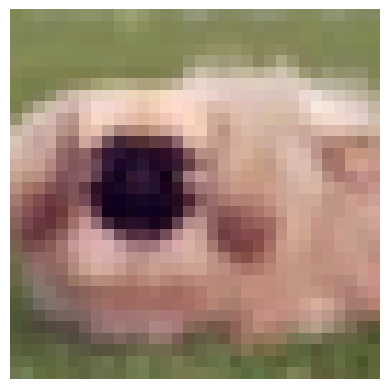

In [12]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


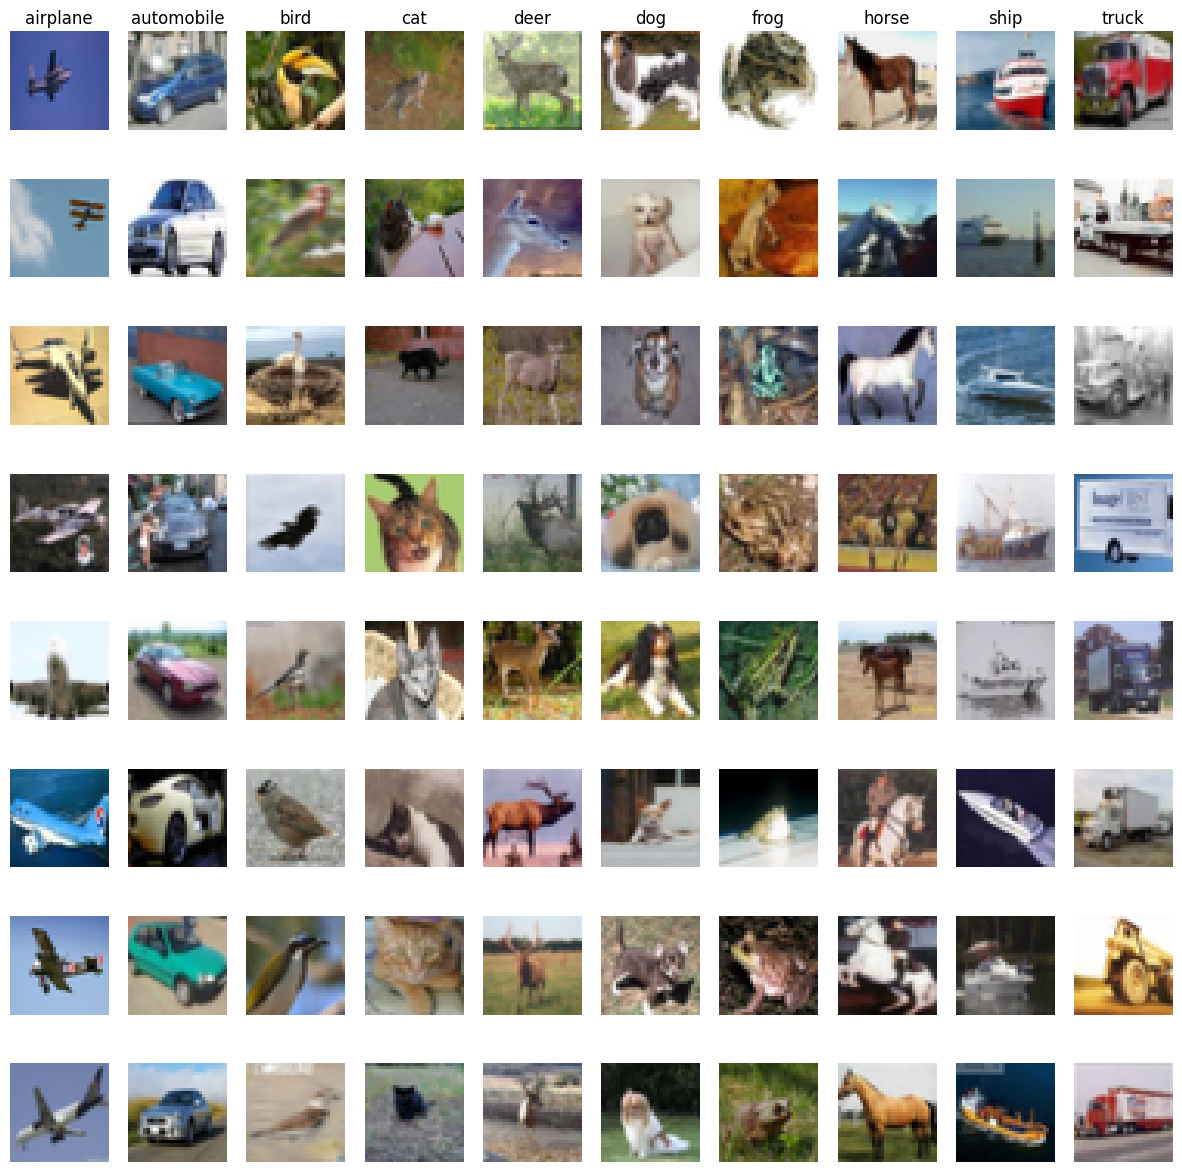

In [13]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')
            
            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid() 

### Calcular accuracy


In [14]:
def accuracy(model, loader):
    # Move the model to the appropriate device (GPU or CPU)
    model = model.to(device=device)

    model.eval()  # Set the model to evaluation mode (disables dropout, batchnorm, etc.)
    
    num_correct = 0  # Variable to count correct predictions
    num_total = 0    # Variable to count total samples

    # Disable gradient computation during evaluation to save memory and computation
    with torch.no_grad():
        for images, labels in loader:  # Iterate over batches from the data loader
            images, labels = images.to(device), labels.to(device)  # Move data to the same device as the model

            # Flatten the images before passing them to the model
            images = images.view(images.size(0), -1)  # Flattening validation images

            # Forward pass: get predictions from the model
            scores = model(images)

            # Get the predicted class by taking the index of the highest score in each sample
            _, pred = scores.max(dim=1)  # 'pred' is of shape (batch_size,)

            # Count the number of correct predictions by comparing predictions to the true labels
            num_correct += (pred == labels).sum().item()  # Count correct predictions

            # Update the total number of samples processed
            num_total += pred.size(0)

    # Calculate accuracy as a percentage
    accuracy = 100 * num_correct / num_total

    return accuracy  # Return the accuracy as a percentage


### Loop de entrenamiento

In [15]:
def train(model, optimiser, epochs):
    # Move the model to the previously defined device
    model = model.to(device)
    
    model.train()  # Set the model to training mode

    for epoch in range(epochs):  # Loop over the dataset multiple times
        running_loss = 0.0  # Variable to accumulate the training loss for reporting

        for batch_idx, (images, labels) in enumerate(train_loader):  # Iterate over each batch
            # Move the data and labels to the same device as the model
            images, labels = images.to(device), labels.to(device)

            # Flatten the images from (batch_size, 3, 32, 32) to (batch_size, 3072)
            images = images.view(images.size(0), -1)  # Ensure flattening before passing to the model
            
            # Forward pass: compute the model output and loss
            scores = model(images)  # Get model predictions (logits)
            cost = F.cross_entropy(input=scores, target=labels)  # Compute cross-entropy loss
            
            # Zero the parameter gradients
            optimiser.zero_grad()

            # Backward pass: compute gradients
            cost.backward()
            
            # Optimiser step: update the model parameters based on the gradients
            optimiser.step()
            
            # Accumulate the loss for this batch
            running_loss += cost.item()

        # Calculate average loss for the epoch
        avg_loss = running_loss / len(train_loader)

        # Calculate accuracy on the validation set
        val_accuracy = accuracy(model, val_loader)

        # Print the epoch, average loss, and accuracy
        print(f'Epoch: {epoch+1}, Cost: {avg_loss:.4f}, Accuracy: {val_accuracy:.2f}%')

    print("Finished Training")


### Linear model

In [16]:
# Define the input and output sizes as variables
input_size = 32 * 32 * 3  # Number of input features (flattened image size)
hidden1 = 1000  # Size of the first hidden layer
hidden = 1000   # Size of the second hidden layer

# Set the learning rate for the optimiser
lr = 1e-4  # Learning rate

output_size = 10  # Number of output classes (CIFAR-10)

epochs= 20

## Create the linear model using these variables
model_Linear = nn.Sequential(
    nn.Linear(in_features=input_size, out_features=hidden1),  # First layer
    nn.ReLU(),  # Activation function
    nn.Linear(in_features=hidden1, out_features=hidden),  # Second layer
    nn.ReLU(),  # Activation function
    nn.Linear(in_features=hidden, out_features=output_size)  # Output layer
)

# Define the optimiser
# Option 1: Stochastic Gradient Descent (SGD) with momentum and weight decay for regularization
optimiser = torch.optim.SGD(model_Linear.parameters(), lr=lr, momentum=0.9, weight_decay=1e-2)

# Option 2: Adam optimiser, which adapts learning rates for each parameter with weight decay for regularization
#optimiser = torch.optim.Adam(model_Linear.parameters(), lr=lr, weight_decay=1e-4)

In [17]:

train(model_Linear, optimiser, epochs)

Epoch: 1, Cost: 2.2500, Accuracy: 27.08%
Epoch: 2, Cost: 2.1489, Accuracy: 29.22%
Epoch: 3, Cost: 2.0751, Accuracy: 30.84%
Epoch: 4, Cost: 2.0163, Accuracy: 32.20%
Epoch: 5, Cost: 1.9679, Accuracy: 33.12%
Epoch: 6, Cost: 1.9275, Accuracy: 34.18%
Epoch: 7, Cost: 1.8930, Accuracy: 35.08%
Epoch: 8, Cost: 1.8633, Accuracy: 35.90%
Epoch: 9, Cost: 1.8375, Accuracy: 36.86%
Epoch: 10, Cost: 1.8150, Accuracy: 37.20%
Epoch: 11, Cost: 1.7948, Accuracy: 38.10%
Epoch: 12, Cost: 1.7765, Accuracy: 38.66%
Epoch: 13, Cost: 1.7599, Accuracy: 38.98%
Epoch: 14, Cost: 1.7446, Accuracy: 39.50%
Epoch: 15, Cost: 1.7301, Accuracy: 40.38%
Epoch: 16, Cost: 1.7168, Accuracy: 40.94%
Epoch: 17, Cost: 1.7043, Accuracy: 41.60%
Epoch: 18, Cost: 1.6926, Accuracy: 42.14%
Epoch: 19, Cost: 1.6817, Accuracy: 42.66%
Epoch: 20, Cost: 1.6711, Accuracy: 42.96%
Finished Training


### Sequential CNN

In [20]:
# Define the CNN model
def modelCNN1():
    model = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, padding=1),  # First conv layer
        nn.ReLU(),
        nn.MaxPool2d(2, 2),                         # Max Pooling 1
        nn.Conv2d(32, 64, kernel_size=3, padding=1), # Second conv layer
        nn.ReLU(),
        nn.MaxPool2d(2, 2),                         # Max Pooling 2
        nn.Flatten(),                               # Flatten for fully connected layers
        nn.Linear(64 * 8 * 8, 1024),                # Fully connected layer
        nn.ReLU(),
        nn.Linear(1024, 10)                         # Output layer (10 classes)
    )
    return model

In [29]:
def accuracy_CNN(model, loader):
    # Move the model to the appropriate device (GPU or CPU)
    model = model.to(device=device)

    model.eval()  # Set the model to evaluation mode (disables dropout, batchnorm, etc.)
    
    num_correct = 0  # Variable to count correct predictions
    num_total = 0    # Variable to count total samples

    # Disable gradient computation during evaluation to save memory and computation
    with torch.no_grad():
        for images, labels in loader:  # Iterate over batches from the data loader
            images, labels = images.to(device), labels.to(device)

            # Forward pass: get predictions from the model
            scores = model(images)

            # Get the predicted class by taking the index of the highest score in each sample
            _, pred = scores.max(dim=1)  # 'pred' is of shape (batch_size,)

            # Count the number of correct predictions by comparing predictions to the true labels
            num_correct += (pred == labels).sum().item()  # Count correct predictions

            # Update the total number of samples processed
            num_total += pred.size(0)

    # Calculate accuracy as a percentage
    accuracy = 100 * num_correct / num_total

    return accuracy  # Return the accuracy as a percentage


In [30]:
def train_CNN(model, optimiser, epochs):
    # Move the model to the previously defined device
    model = model.to(device)
    
    model.train()  # Set the model to training mode

    for epoch in range(epochs):  # Loop over the dataset multiple times
        running_loss = 0.0  # Variable to accumulate the training loss for reporting

        for batch_idx, (images, labels) in enumerate(train_loader):  # Iterate over each batch
            # Move the data and labels to the same device as the model
            images, labels = images.to(device), labels.to(device)

            # NO FLATTENING NEEDED for CNN, pass the images directly
            # Forward pass: compute the model output and loss
            scores = model(images)  # Get model predictions (logits)
            cost = F.cross_entropy(input=scores, target=labels)  # Compute cross-entropy loss
            
            # Zero the parameter gradients
            optimiser.zero_grad()

            # Backward pass: compute gradients
            cost.backward()
            
            # Optimiser step: update the model parameters based on the gradients
            optimiser.step()
            
            # Accumulate the loss for this batch
            running_loss += cost.item()

        # Calculate average loss for the epoch
        avg_loss = running_loss / len(train_loader)

        # Calculate accuracy on the validation set
        val_accuracy = accuracy_CNN(model, val_loader)

        # Print the epoch, average loss, and accuracy
        print(f'Epoch: {epoch+1}, Cost: {avg_loss:.4f}, Accuracy: {val_accuracy:.2f}%')

    print("Finished Training")


In [31]:
# To do: Use PyTorch to implement a CNN model, accuracy should be better than 
#the linear model
model = modelCNN1().to(device)
optimiser = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# Create the CNN model
modelCNN = modelCNN1().to(device)

# Define optimizer and number of epochs
optimiser = optim.Adam(modelCNN.parameters(), lr=1e-3)
epochs = 10

# Train the model
train_CNN(modelCNN, optimiser, epochs)

Epoch: 1, Cost: 1.3110, Accuracy: 62.86%
Epoch: 2, Cost: 0.9086, Accuracy: 69.20%
Epoch: 3, Cost: 0.7192, Accuracy: 70.42%
Epoch: 4, Cost: 0.5490, Accuracy: 72.34%
Epoch: 5, Cost: 0.3754, Accuracy: 73.22%
Epoch: 6, Cost: 0.2170, Accuracy: 71.94%
Epoch: 7, Cost: 0.1147, Accuracy: 72.32%
Epoch: 8, Cost: 0.0699, Accuracy: 72.74%
Epoch: 9, Cost: 0.0500, Accuracy: 72.58%
Epoch: 10, Cost: 0.0532, Accuracy: 71.76%
Finished Training
